In [3]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
#load dataset breast cancer

import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [11]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
import numpy as np

data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isnull().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [14]:
data = data.fillna(data.median())

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isnull().sum()))

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 0
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


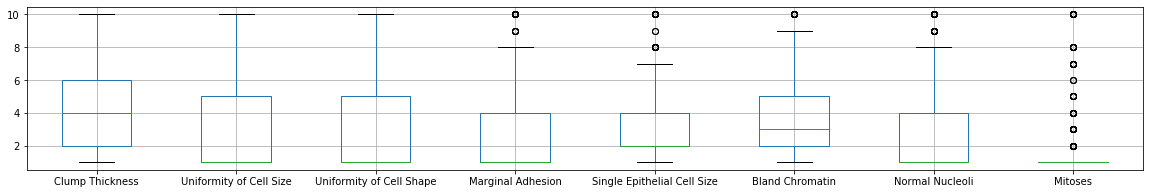

In [25]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
#deteksi outlier atau noise using boxplot

%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2.boxplot(figsize=(20,3))

http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).


In [26]:
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
Z = (data2 - data2.mean())/data2.std()
Z[:10]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.798376,-0.179534,-0.283909,-0.343666
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.410392,-0.179534,-0.611387,-0.343666
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.141800,-0.179534,1.353485,-0.343666
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666
5,1.272227,2.249915,2.285586,1.818719,1.708882,1.798376,2.281132,1.353485,-0.343666
6,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,1.798376,-0.179534,-0.611387,-0.343666
7,-0.858651,-0.699494,-0.406284,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666
8,-0.858651,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.999756,-0.611387,1.988590
9,-0.148359,-0.371782,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666


In [27]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
#hapus outlier

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding outliers = 648


In [28]:
#cleaning outlier/noise data using k-means

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

nclust = 30
X = data2.values[:,:-1]

#Proses K-Means
kmeans = KMeans(n_clusters=nclust).fit(X)
labels = kmeans.labels_
print(X.shape)
# Proses Penghapusan data
for i in range(0, nclust):
    count = np.count_nonzero(labels == i)
    if count <= 5:
        indexDelete = np.where(labels == i)
        X = np.delete(X, indexDelete, axis=0)
        labels = np.delete(labels, indexDelete, axis=0)
        
print(X.shape)

(699, 8)
(677, 8)


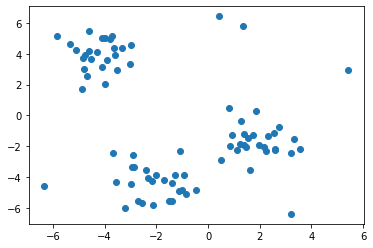

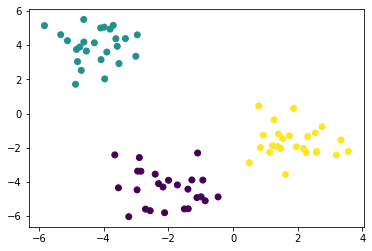

In [34]:
#cleaning noise data using k-means

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

d = pd.read_csv("./dataset_noise.csv", index_col=0)
dataset = d.values

plt.scatter(dataset[:, 0], dataset[:, 1], marker='o')
plt.show()

nclust = 11

#Proses K-Means
dataset = d.values
kmeans = KMeans(n_clusters=nclust).fit(dataset)
labels = kmeans.labels_

#plt.scatter(dataset[:, 0], dataset[:, 1], marker='o', c=labels)
#plt.show()

# Proses Penghapusan data
for i in range(0, nclust):
    count = np.count_nonzero(labels == i)
    if count <= 3:
        indexDelete = np.where(labels == i)
        dataset = np.delete(dataset, indexDelete, axis=0)
        labels = np.delete(labels, indexDelete, axis=0)

kmeans_after = KMeans(n_clusters=3).fit(dataset)
labels_after = kmeans_after.labels_
        
plt.scatter(dataset[:, 0], dataset[:, 1], marker='o', c=labels_after)
plt.show()

In [29]:
#remove duplicate data

dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (data2.shape[0]))
data3 = data2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of duplicate rows = 242
Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 699


1     52
2     24
3     58
4     47
5     95
6     30
7     23
8     46
9     13
10    69
Name: Clump Thickness, dtype: int64

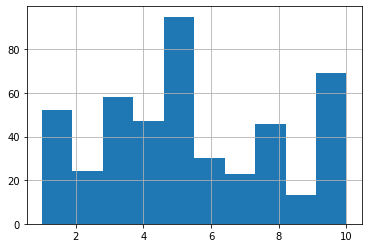

In [30]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
#partition into (equal-frequency) bins

data3['Clump Thickness'].hist(bins=10)
data3['Clump Thickness'].value_counts(sort=False)

In [31]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
#smoothing using binning equal width method using function cut

bins = pd.cut(data3['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    134
(3.25, 5.5]      142
(5.5, 7.75]       53
(7.75, 10.0]     128
Name: Clump Thickness, dtype: int64

In [32]:
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html
#smoothing using binning equal frequency method using function qcut

bins = pd.qcut(data3['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 3.0]    134
(3.0, 5.0]      142
(5.0, 8.0]       99
(8.0, 10.0]      82
Name: Clump Thickness, dtype: int64

In [35]:
# kode sumber: https://github.com/navicto/Discretization-MDLPC
# Reference Entropy-based binning: Irani, Keki B. "Multi-interval discretization of continuous-valued attributes for classiﬁcation learning." (1993).

import numpy as np
from sklearn import datasets
from MDLP import MDLP_Discretizer

#read dataset
dataset = datasets.load_iris()
X, y = dataset['data'], dataset['target']
feature_names, class_names = dataset['feature_names'], dataset['target_names']
numeric_features = np.arange(X.shape[1])  
# all fetures in this dataset are numeric. These will be discretized

#Initialize discretizer object and fit to dataset
discretizer = MDLP_Discretizer(features=numeric_features)
discretizer.fit(X, y)
X_discretized = discretizer.transform(X)

#Print a slice of original and discretized data
print ('Original dataset:\n%s' % str(X[0:5]))
print ('Discretized dataset:\n%s' % str(X_discretized[0:5]))

#see how feature 1 was discretized
print ('Feature: %s' % feature_names[1])
print ('Interval cut-points: %s' % str(discretizer._cuts[1]))
print ('Bin descriptions: %s' % str(discretizer._bin_descriptions[1]))

Original dataset:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Discretized dataset:
[[0. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 2. 0. 0.]]
Feature: sepal width (cm)
Interval cut-points: [2.95, 3.3499999999999996]
Bin descriptions: {0: '-inf_to_2.95', 1: '2.95_to_3.3499999999999996', 2: '3.3499999999999996_to_inf'}


C:\Users\chast\OneDrive\Documents\notebook_DM\MDLP.py:171: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_and((self._boundaries[:, feature_idx] > range_min), (self._boundaries[:, feature_idx] < range_max))
C:\Users\chast\OneDrive\Documents\notebook_DM\MDLP.py:171: RuntimeWarning: invalid value encountered in less
  mask = np.logical_and((self._boundaries[:, feature_idx] > range_min), (self._boundaries[:, feature_idx] < range_max))
